## Module: Data Understanding and Preparation

    
### Lecture 1: Statistics from Data Science perspective
 
 
This material has the following parts:
    
    
__Statistics dashboard:__ Sampling and Hypothesis Testing (Cells 1, 2 )<br>
__Analysis of Variance__  (Cells 3, 4 ) <br>
__Correlation and Causality__ (Cells 5, 6, 7 )
</ol>

<div class="alert alert-info" style="margin: 10px"><strong>Note:</strong>
<br> Basic functions and information to run 
</div>

In [1]:
# CELL 1

import pandas as pd
import seaborn as sns
import numpy as np
import random
import scipy.stats as st
import math
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, expon, gamma



def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

cases = dict()

cases['Bulb Manufacturer'] = 'A light bulb manufacturer claims that its energy saving light bulbs last on average 60 days. A sampling of size 49 is collected from the production output with a mean of 56.5 days. Using confidence level 0.05, can we statically reject the claim of the manufacturer? Assume that the standard deviation of bulb lifetime is 9 days.'
cases['New Supplier'] = 'The deviation in target length of the parts from the new supplier must be smaller than the target value of 1.5 mm to change the current supplier. We want to find statistical evidence that the parts of the new supplier have significantly less deviation to change the supplier. A sampling of size 45 is collected from the products of the new supplier with a mean of  1.2 mm. Using confidence level 0.01, can we statically reject the null hypothesis? Assume that the standard deviation of the products of the current supplier is 0.4 mm. Can we reject the null hypothesis in the favour of the new supplier?'                   
cases['Contamination of food 1'] = 'The Food and Drug Administration (FDA) sets acceptable levels of foreign substances that end up in our food and drink. The acceptable level for insect fragments in peanut butter is 3 fragments per 10 grams. We are interested in finding problematic products in market; i.e. the food sampling that significantly contains fragments more than allowed in the regulation. A sampling of size 50 is collected from the products of a food producer with a mean of 3.6 fragments per 10 grams. Using confidence level 0.05, can we statically reject the null hypothesis? Assume that the standard deviation of all products is √3. Can we reject the null hypothesis to penalize the food producer?'
cases['Contamination of food 2'] = 'The Food and Drug Administration (FDA) sets acceptable levels of foreign substances that end up in our food and drink. The acceptable level for insect fragments in peanut butter is 3 fragments per 10 grams. A sampling of size 20 is collected from the products of a food producer with a mean of 3.6 fragments per 10 grams. Using confidence level 0.05, can we statically reject the null hypothesis? Assume that the standard deviation of all products is 1.73. Can we reject the null hypothesis to penalize the food producer?'
cases['Job performance'] ='Jane has just begun her new job as on the sales force of a very competitive company. In a sample of 32 sales calls it was found that she closed the contract for an average value of $108. Test at 5% significance that the population mean is at least $100 against the alternative that it is less than 100 dollars. Assume that standard deviation of all sales done in company is 12 dollars. Company policy requires that new members of the sales force must exceed an average of $100 per contract during the trial employment period. Can we conclude that Jane has met this requirement at the significance level of 95%?'
cases['Testing expensive goggles']= 'Jeffrey, as an eight-year old, established a mean time of 16.43 seconds for swimming the 25-yard freestyle, with a standard deviation of 0.8 seconds. His dad, Frank, thought that Jeffrey could swim the 25-yard freestyle faster using goggles. Frank bought Jeffrey a new pair of expensive goggles and timed Jeffrey for 15 25-yard freestyle swims. For the 15 swims, Jeffrey’s mean time was 16 seconds. Frank thought that the goggles helped Jeffrey to swim faster than the 16.43 seconds. Conduct a hypothesis test using a preset α = 0.05.'
cases['Machine repair decision'] = 'A manufacturer of salad dressings uses machines to dispense liquid ingredients into bottles that move along a filling line. The machine that dispenses salad dressings is working properly when 8 ounces are dispensed. Suppose that the average amount dispensed in a particular sample of 35 bottles is 7.91 ounces and assume that the standard deviation of all samples is 0.173 ounces. Is there evidence that the machine should be stopped, and production wait for repairs? The lost production from a shutdown is potentially so great that management feels that the level of significance in the analysis should be 99%.'
cases['Man Weight'] = 'The municipality of a town made a questionnaire to find evidence to the claim that the mean average weight of men in town is greater than 100kgs and assume that the standard deviation of all men in town is 15kgs. 30 men are chosen with an average weight of 112.5 Kgs. Using hypothesis testing, check if there is enough evidence to support the claim. The confidence interval is given as 95%.'

def TestHypothesis2(sample_size,sample_mean,sample_stdev,pop_mean,pop_stdev,twosided,alt_side,conflevel,wout):
    # pop_stdev is None is population stdev is not specified.
    # sample_stdev is None is sampling stdev is not specified.
    # alt_side is checked only if twosided is False and can be either '<' or '>'
    
    global testingtext
    
    with wout:
        
        clear_output(wait = True)
        ztest = False
        test_stat = 0
        p_val = 0
        conclusion = ''
        H_null = 'H0 : \mu '
        H_alt = 'H1 : \mu '
        
        ayz = None


        typestr = 'Two-sided'
        if not twosided:
            typestr = 'One-sided'
            if alt_side == '>':
                H_null += ' =< '+str(pop_mean)
                H_alt += '> '+str(pop_mean)
            else:
                H_null += ' >= '+str(pop_mean)
                H_alt += '< '+str(pop_mean)

        else:
            H_null += '= '+str(pop_mean)
            H_alt += '!= '+str(pop_mean)

        teststatstr = 'z-score'
        dof = 1

        if pop_stdev is None:
            # use t-score with sample stdev 
            test_stat = (sample_mean-pop_mean)/(sample_stdev/np.sqrt(sample_size))
            teststatstr = 't-score'
        else:
            if sample_size >= 30:
            # use z-score
                test_stat = (sample_mean-pop_mean)/(pop_stdev/np.sqrt(sample_size))
                ztest = True 
            else:
            # use t-score with pop_stdev
                test_stat = (sample_mean-pop_mean)/(pop_stdev/np.sqrt(sample_size))
                teststatstr = 't-score'
                
             
        dof = sample_size-1   
       

        if ztest: 
            cum_area = st.norm.cdf(test_stat) 
        else:
           # p_val = st.t.sf(np.abs(test_stat), dof)
            cum_area = st.t.cdf(test_stat, df = dof)

        if twosided: 
            if sample_mean > pop_mean:
                p_val = 2*(1-cum_area)
            else:
                p_val = 2*cum_area
        else:
            if alt_side == '>':
                p_val = 1- cum_area 
            else:
                p_val =  cum_area 
                
      

        if p_val < conflevel:
            conclusion = 'Reject H0!'
        else:
            conclusion = 'Fail to reject H0!'
            
        

        axs = np.arange(min(-5,p_val-0.25),max(5,p_val+0.25), 0.1) # x from -6 to 6 in steps of 0.1 
        
        width = 6
        height = 6
        sns.set(rc = {'figure.figsize':(width,height)})
      
        plt.xlim(0,0.45)
       
     
        plt.text(min(-5,p_val-0.25)+0.1, 0.34, 'test statistic:', dict(size=10))
        plt.text(min(-5,p_val-0.25)+0.1, 0.32, str(round(test_stat,2)), dict(size=10))
        if twosided:
            plt.text(min(-5,p_val-0.25)+0.1, 0.39, 'Rejection boundaries:', dict(size=10))
        else:
            plt.text(min(-5,p_val-0.25)+0.1, 0.39, 'Rejection region:', dict(size=10))
        plt.xlim(min(-5,p_val-0.25),max(5,p_val+0.25))
        plt.xlabel('Test statistic', fontsize=10, color='black')
        plt.ylabel('PDF value', fontsize=10, color='black')
        plt.title("Hypothesis testing: "+teststatstr)
        
        if ztest:
            # Mean = 0, SD = 1.
            ayz =norm.pdf(axs,0,1)
            plt.plot(axs, ayz,'k')
        else:
            ayz = st.t.pdf(axs,dof)
            plt.plot(axs,ayz, 'r')

        rejreg_left = '- inf'
        rejreg_right = 'inf'

        tcase= ''
        if twosided:

           
            if ztest: 
                rejreg_left = norm.ppf(abs(0.5*conflevel),loc=0,scale=1)
                rejreg_right = norm.ppf(1-abs(0.5*conflevel),loc=0,scale=1)
 
            else:
                rejreg_left = st.t.ppf(0.5*conflevel,dof)
                rejreg_right = st.t.ppf(1-0.5*conflevel,dof)

            plt.fill_between(axs,ayz,where = (axs<=-abs(rejreg_left)) | (axs>=abs(rejreg_right)))
           
            plt.axvline(x=-test_stat,ymin=0,color='b', label='confidence level',linewidth=1)
            plt.axvline(x=test_stat, color='b', label='confidence level',linewidth=1)
        else:
            if alt_side == '>': # one-side: right tail
                if ztest: 
                    rejreg_left = norm.ppf(1-abs(conflevel),loc=0,scale=1)
                else:
                    rejreg_left = st.t.ppf(1-abs(conflevel),dof)

          
             
                plt.axvline(x=test_stat,ymin=0, color='b', label='confidence level',linewidth=1)   
                plt.fill_between(axs,ayz,where = (axs>=abs(rejreg_left)) )


            else: # one-sided: left tail
                if ztest: 
                    rejreg_right = norm.ppf(abs(conflevel),loc=0,scale=1)
                else:
                    rejreg_right = st.t.ppf(abs(conflevel),dof)

                plt.axvline(x= test_stat,ymin=0, color='b', label='confidence level',linewidth=1)
                plt.fill_between(axs,ayz,where = (axs<=-abs(rejreg_right)) )
                  
        if rejreg_left != '- inf':
            rejreg_left = round(rejreg_left,3)
                   
        if rejreg_right != 'inf':
            rejreg_right = round(rejreg_right,3)
            
        
        testingtext.value = H_null+'\n'  
        testingtext.value += H_alt+'\n' 
      
        
        plt.text(-0.45, 0.32, 'n='+str(sample_size), dict(size=10))
        plt.text(2.5, 0.39, 'Conf. level= '+str(round(conflevel,2)), dict(size=10))
        plt.text(2.5, 0.36, 'P_val = '+str(round(p_val,4)), dict(size=10))
    
        
        if twosided:
            plt.text(min(-5,p_val-0.1)+0.1, 0.37,''+str(rejreg_left)+','+str(rejreg_right)+'', dict(size=10))
        else:
            plt.text(min(-5,p_val-0.1)+0.1, 0.37,'['+str(rejreg_left)+','+str(rejreg_right)+']', dict(size=10))
        plt.show()

    return p_val,conclusion



<div class="alert alert-info" style="margin: 10px"><strong>Statistics dashboard:</strong>
<br> Sampling tab: is to examine sampling properties from a given emperical population. 
<br> Hypothesis testing tab: Given several cases, fill the necessary parts and make hypothesis testing. 
<br> Visual library ipywidgets is necessary for to install!
</div>

In [9]:
# CELL 2

##### import ipywidgets as widgets
from IPython.display import clear_output
from IPython import display
from ipywidgets import *
from datetime import timedelta,date
import matplotlib.pyplot as plt

# Correctly solved the examples:
#https://www.cuemath.com/data/hypothesis-testing/
#https://statisticsbyjim.com/hypothesis-testing/one-tailed-two-tailed-hypothesis-tests/
#https://uw.pressbooks.pub/quantbusiness/chapter/hypothesis-testing-with-one-sample/

import warnings
import seaborn as sns


warnings.filterwarnings("ignore")


    
    
def CheckInputComplete():
    
    global POPMEANtxt,SAMPMEANtxt,SAMPSIZEtxt,box,box2,sampstdev,mytxt
    
    if not is_float(POPMEANtxt.value):
        return False
    
    if not is_float(SAMPMEANtxt.value):
        return False
    
    if not is_float(SAMPSIZEtxt.value):
        return False
    
    if (not box.value) and (not box2.value):
        return False
    else:
        if (box2.value):
            if not is_float(sampstdev.value):
                return False
        if (box.value):
            if not is_float(mytxt.value):
                return False

            
    return True

def PlotNumbers(Conf_level):
    
    
    global mytxt2,InvFigPage,POPMEANtxt,box,box2,SAMPSIZEtxt,SAMPMEANtxt,conflvl,smapchange
    
    if not CheckInputComplete():
        return

   
    
    Pop_mean = float(POPMEANtxt.value)
    Pop_stdev = None
    if box.value: 
        if is_float(mytxt.value):
            Pop_stdev = float(mytxt.value)
            
   
       
 
    Samp_size = int(SAMPSIZEtxt.value)+smapchange
    
    if Samp_size < 2:
        return
    
    
    Samp_mean = float(SAMPMEANtxt.value)
    Samp_stdev = None 
    
    if (box2.value):
        if is_float(sampstdev.value):
            Samp_stdev = float(sampstdev.value)
        
    
        
    Conf_lvl = float(conflvl.value)
    Two_sided = hptype.value
    
    Alt_side = '' # only read in one-sided case: '>' or '<' -> H_1: \mu > x or \mu < x (x is claimed population parameter)
    if not Two_sided:
        Alt_side = alternative.value
        
    testreturn = TestHypothesis2(Samp_size,Samp_mean,Samp_stdev,Pop_mean,Pop_stdev,Two_sided,Alt_side,Conf_lvl,InvFigPage) 
  
    return

def Sample_Change(Size_delta):
    
    global smapchange,conflvl,SAMPSIZEtxt
    
    smapchange = Size_delta
    
   
    if not SAMPSIZEtxt.value.isnumeric():
        return

    if smapchange+int(SAMPSIZEtxt.value) < 2:
        return
     
        
    PlotNumbers(conflvl.value)
    
    return

def popchanged(b):
    
    global mytxt,box,box2 
    if mytxt.layout.visibility == 'hidden':
        mytxt.layout.visibility = 'visible'
    else:
        mytxt.layout.visibility = 'hidden'
        
    if box.value:
        box2.value = False
    
    return

def smpchanged(b):    
    global sampstdev,box,box2
    
    if sampstdev.layout.visibility == 'hidden':
        sampstdev.layout.visibility = 'visible'
    else:
        sampstdev.layout.visibility = 'hidden'
        
    if box2.value:
        box.value = False  
        
    return

def typechanged(b):
    global hptype,hptype2
    
    if hptype.value:
        hptype2.value = False
   
    return

def type2changed(b):
    
    global alternative,hptype,hptype2
    
    if hptype2.value:
        hptype.value = False
 
    if alternative.layout.visibility == 'hidden':
        alternative.layout.visibility = 'visible'
    else:
        alternative.layout.visibility = 'hidden'
    return

def casechange(b):
    
    global caseexp
    
    caseexp.value = cases[exmplst.value]
    return


def adjustssize(b):
    
    global SAMPSIZEtxt,items2
    
    if not is_float(SAMPSIZEtxt.value):
        return False
                              
    return
    
##################################################################################################################
###############################################  TAB: Hypothesis Testing ##################################################
##################################################################################################################
smapchange = 0

hbox_layout = widgets.Layout(align_items='center')

mytxt = widgets.Text(description = '', value='',disabled=False,layout = widgets.Layout(width='150px'))
sampstdev = widgets.Text(description = '', value='',disabled=False,layout = widgets.Layout(width='150px'))
mytxt.layout.visibility = 'hidden'
sampstdev.layout.visibility = 'hidden'

POPMEANtxt = widgets.Text(description = 'P.Mean', value='',disabled=False,layout = widgets.Layout(width='250px'))
SAMPMEANtxt = widgets.Text(description = 'S.Mean', value='',disabled=False,layout = widgets.Layout(width='250px'))
SAMPSIZEtxt = widgets.Text(description = 'S.Size', value='',disabled=False,layout = widgets.Layout(width='250px'))
POPgiven = widgets.Dropdown(options=['Given','Not given'], description='Population stdev:')
box = widgets.Checkbox(False, description='Population Stdev')
box2 = widgets.Checkbox(False, description='Sample Stdev')

hptype = widgets.Checkbox(True, description='Two-sided')
hptype2 = widgets.Checkbox(False, description='One-sided')

alternative = widgets.Dropdown(options=['<','>'], description='Alternative:')
alternative.layout.visibility = 'hidden'

x = Label("Population and Sample Input")
inpt = Label("Hypothesis Testing Properties")
z  = Label("Population Mean:")
cnf  = Label("Confidence Level:")
z2 = Label("Sample Mean:")
smpsizelbl = Label("Sample Size:")

box.observe(popchanged)
box2.observe(smpchanged)
hptype.observe(typechanged)
hptype2.observe(type2changed)


exmplst = widgets.Dropdown(options=[v for v in cases.keys()], description='Cases')
caseexp = widgets.Textarea(value='', placeholder='example ',description='Example:',disabled=True,layout = widgets.Layout(width='100%',height='130px'))

caseexp.value = cases[exmplst.value]
exmplst.observe(casechange)


#conflvl = widgets.FloatSlider(min=0.01,max=0.1,step=0.01,value=0.05)

mytxt2 = widgets.Text(description = 'Numbers', value='',disabled=False)
mybutton2 = widgets.Button(description='Solve', disabled=False,layout = widgets.Layout(align_items='flex-end',width = '150px'))

figpg_layout = widgets.Layout(width='85%',height='45%',align_items='center')
InvFigPage = widgets.Output(layout=figpg_layout)


mybutton2.on_click(PlotNumbers)


mybutton3 = widgets.Button(description='Save', disabled=False,layout = widgets.Layout(align_items='flex-end',width = '150px'))



#f =interactive(PlotNumbers, Conf_level=0.05,min=0.01,max=0.1,step=0.01);
f =interactive(PlotNumbers, Conf_level = widgets.FloatSlider(min=0.01,max=0.1,step=0.01,value=0.05));
items = [c for c in f.children]
items.insert(0,cnf)



f2 =interactive(Sample_Change, Size_delta = widgets.IntSlider(min=-25,max=25,step=5,value=0));
items2 = [c for c in f2.children]

items2.insert(0,SAMPSIZEtxt)
items2.insert(0,SAMPMEANtxt)
items2.insert(0,POPMEANtxt)


SAMPSIZEtxt.observe(adjustssize)


conflvl = items[1]

tablayout = widgets.Layout(align_items='center',width= '100%',height='1450px')

resultexp = widgets.Textarea(value='', placeholder=' ',description='Conclusion:',disabled=False,layout = widgets.Layout(width='90%',height='130px'))
testingtext = widgets.Textarea(value='', placeholder=' ',description='',disabled=True,layout = widgets.Layout(width='99%',height='65px'))


tab_1 = VBox(children=[
    HBox(children = [exmplst,caseexp],layout=Layout(width='95%')),
    x,           
    HBox(children = [VBox(children=items2),VBox(children=[box,box2]),VBox(children=[mytxt,sampstdev])]),
    inpt,
    HBox(children = items,layout=hbox_layout),
    VBox(children = [
         HBox(children = [hptype],layout=Layout(width='95%')),
         HBox(children = [hptype2,alternative],layout=Layout(width='95%')),testingtext
    ]),
    VBox(children=[mybutton2]),InvFigPage,resultexp,mybutton3],layout=tablayout)


##################################################################################################################
###############################################  TAB: Sampling ##################################################
##################################################################################################################
from scipy.stats import uniform, norm, expon, gamma
import numpy as np
import math
from matplotlib.ticker import PercentFormatter

Population = None
Sample = []
AverageProgress = []
SampleSet = []
distributions = [norm,uniform,expon]
pop_df = None


####################################################################################################################
def on_submit_func(sender):
    
    global PopPage,poptypes,popsizetxt,popmeantxt,popstdevtxt
    global Population,popempmeantxt,popempstdevtxt
    
    

    if CheckAllInput():
        popindex =  0
        
        for popty in range(len(poptypes.options)):
            if poptypes.options[popty] == poptypes.value:
                popindex = popty
                break
        
        
        if poptypes.value == 'Normal':
             Population = norm.rvs(size=int(popsizetxt.value), loc = int(popmeantxt.value), scale=int(popstdevtxt.value))
        if poptypes.value == 'Uniform':
            b = math.sqrt(3)*int(popstdevtxt.value)+int(popmeantxt.value)
            a = int(popmeantxt.value)-math.sqrt(3)*int(popstdevtxt.value)
            Population = uniform.rvs(size=int(popsizetxt.value), loc = a, scale=b-a)
        if poptypes.value == 'Exponential':
            Population = expon.rvs(scale=int(popmeantxt.value),size=int(popsizetxt.value))
                
        emp_mean  =sum(Population)/len(Population)
        emp_stdev = math.sqrt(sum([(x-emp_mean)**2 for x in Population])/len(Population))
        
        popempmeantxt.value = str(round(emp_mean,4))
        popempstdevtxt.value = str(round(emp_stdev,4))
        
    else:
        print('Check is false')
    
    Draw()   

    return

####################################################################################################################


def Draw():
    
    global PopPage,Population,Sample,pop_df,poptypes
    
    if Population is None:
        return
    
    all_df = None
    
    with PopPage:
        
        clear_output()
        
        popmean = sum(Population)/len(Population)
        popstdev = math.sqrt(sum([(x-popmean)**2 for x in Population])/len(Population))
        
        poptype = poptypes.value 
        ystart = 2
        yincrement = 0.25
        
        #if poptype == 'Exponential':
            

        width = 10
        height = 4
        sns.set(rc = {'figure.figsize':(width,height)})
        pop_df = pd.DataFrame({'Value': Population[:]})
        sns.displot(x='Value',data = pop_df, kind="hist", stat="percent", kde=True)
        plt.xlim(0.9*min(Population),1.1*max(Population))
        plt.title("Empirical Population ("+str(poptypes.value)+")")
        plt.text(min(Population)+0.1, ystart, 'n= '+str(len(pop_df)), dict(size=10))
        plt.text(min(Population)+0.1, ystart-yincrement, 'Mean= '+str(round(popmean,2)), dict(size=10))
        plt.text(min(Population)+0.1, ystart-2*yincrement, 'Stdev= '+str(round(popstdev,2)), dict(size=10))
        plt.show()
    
    return 

def SamplePopulation(Sample_size):
    global Population
    
    CurrSample = []

    curr_avg = 0
    for i in range(Sample_size):
        element=np.random.randint(len(Population))
        CurrSample.append(Population[element])
        np.delete(Population,element)
    
    for itm in CurrSample:
        np.append(Population,itm)
        
    return CurrSample


def smpsizesubmit(sender):
    
    global smpsizetxt,Population,smpmeantxt,smpstdevtxt,SampleSet,smpsetsizetxt
    global SampleSets,smpsetmeantxt,smpsetstdevtxt,chk1,chk2
    
    
    if smpsizetxt.value == '':
        return
    
    if not is_float(smpsizetxt.value):
        return 
    
    if Population is None:
        return
    
    Sample = SamplePopulation(int(smpsizetxt.value))
    
    
    smp_mean = sum(Sample)/len(Sample)
    smpmeantxt.value = str(round(smp_mean,3))
    
    smp_stdev = sum([(x-smp_mean)**2 for x in Sample])/len(Sample)
    smpstdevtxt.value = str(round(smp_stdev,3))
    
    SampleSet.append(Sample)
    
    smpsetsizetxt.value = str(len(SampleSet))
    
    ssetmeans = [sum(s)/len(s) for s in SampleSet]
    overallmean = sum(ssetmeans)/len(ssetmeans)
    smpsetmeantxt.value = str(overallmean)
    smpsetstdevtxt.value = str(math.sqrt(sum([(x-overallmean)**2 for x in ssetmeans])/len(ssetmeans)))
    
    if chk2.value: 
 
        with SampleSets:
            clear_output()
            width = 8
            height = 8
            sns.set(rc = {'figure.figsize':(width,height)})
            sns.distplot(ssetmeans,kde=True,hist=True)
            plt.title("Sample Set: n = "+str(len(SampleSet))+', size '+str(smpsizetxt.value))
            plt.show()

    if chk1.value: 
        
         with SampleSets:
            clear_output()
            width = 8
            height = 8
            sns.set(rc = {'figure.figsize':(width,height)})
            smp_df = pd.DataFrame({'Mean': ssetmeans[:],'ID':[s for s in range(len(SampleSet))],'Size':[len(s) for s in SampleSet]})
            sns.relplot(x='ID', y='Mean',hue='Size',data=smp_df,alpha=.5, palette="muted", height=9)       
            plt.title('Means vs Sample Size')
            plt.show()
       
    return


def CheckAllInput():
    
    global popsizetxt,popmeantxt,popstdevtxt,poptypes
    
    
    if popsizetxt.value == '':
        return False
    else:
        if not is_float(popsizetxt.value):
            return False
    
    if popmeantxt.value == '':
        return False
    else:
        if not is_float(popmeantxt.value):
            return False
        
    if poptypes.value != 'Exponential':
        if popstdevtxt.value == '':
            return False
        else:
            if not is_float(popstdevtxt.value):
                return False
    
    return True

def SampleSizeChange(Delta):
    
    
    return 


def ResetSamples(Change):
    
    ResetSampleSet()
    
    return 


def ResetSampleSet():
    
    global SampleSet,smpmeantxt,smpstdevtxt,smpsetsizetxt,smpsetmeantxt,smpsetstdevtxt
    global SampleSets,AvgProg

    
    smpmeantxt.value = ''
    smpstdevtxt.value = ''
    smpsetsizetxt.value = ''
    smpsetmeantxt.value = ''
    smpsetstdevtxt.value = ''
    
    with SampleSets:
        clear_output()
   
    SampleSet.clear()
    
  
    return 



def typechangs(*args):
    
    global poptypes,popstdevtxt,popempmeantxt,popempstdevtxt,PopPage
    
    if poptypes.value == 'Exponential':
        popstdevtxt.value = ''
        popstdevtxt.disabled = True
    else:
        popstdevtxt.disabled = False
        
    popempmeantxt.value = ''
    popempstdevtxt.value = ''
    ResetSampleSet()
      
    with PopPage:
        clear_output()
    

    return
def plot1changed(b):
    global chk1,chk2
    
    if chk1.value:
        chk2.value = False

    return

def plot2changed(b):
    global chk1,chk2
    
    if chk2.value:
        chk1.value = False

    return

# Normal, Uniform, Exponential
drplyout = widgets.Layout(width= '180px')
txtlyout = widgets.Layout(width= '150px')
txtmlyout = widgets.Layout(width= '180px')
lbllyout = widgets.Layout(width= '195px')

poplbl= widgets.Label(description = 'Population', value='Population Parameters',disabled=False,layout = lbllyout)
poplbl2= widgets.Label(description = 'Population', value='',disabled=False,layout = lbllyout)
popemplbl= widgets.Label(description = '', value='Emperical Distribution',disabled=False,layout = lbllyout)
poptypes = widgets.Dropdown(options=['Normal','Uniform','Exponential'], description='Pop.Type:',layout = drplyout)
popsizetxt= widgets.Text(description = 'Size', value='',disabled=False,layout = txtlyout)
popmeantxt= widgets.Text(description = 'Mean', value='',disabled=False,layout =txtmlyout)
popstdevtxt= widgets.Text(description = 'StDev', value='',disabled=False,layout = txtlyout)

popempmeantxt= widgets.Text(description = 'Mean', value='',disabled=True,layout =txtmlyout)
popempstdevtxt= widgets.Text(description = 'StDev', value='',disabled=True,layout = txtlyout)

poptypes.observe(typechangs,'value')



if poptypes.value == 'Exponential':
    popstdevtxt.value = ''
    popstdevtxt.disabled = True
else:
    popstdevtxt.disabled = False


smplay = widgets.Layout(width= '130px',align_items='flex-start')
lsbllyout = widgets.Layout(width= '60px')
smplbl= widgets.Label(description = '', value='Sample',disabled=False,layout = lsbllyout)
smpsizetxt= widgets.Text(description = 'Size', value='',disabled=False,layout = smplay)

popstdevtxt.on_submit(on_submit_func)
popmeantxt.on_submit(on_submit_func)
smpsizetxt.on_submit(smpsizesubmit)


smpmeantxt= widgets.Text(description = 'Mean', value='',disabled=True,layout =txtmlyout)
smpstdevtxt= widgets.Text(description = 'StDev', value='',disabled=True,layout = txtlyout)


gnbllyout = widgets.Layout(width= '60px')
gnrlbl= widgets.Label(description = '', value='Samp.Set: ',disabled=False,layout = gnbllyout)
smpsetlay = widgets.Layout(width= '130px')
smpsetsizetxt= widgets.Text(description = 'Size:', value='',disabled=False,layout =smpsetlay)

smpsetmeantxt= widgets.Text(description = 'Mean', value='',disabled=True,layout =txtmlyout)
smpsetstdevtxt= widgets.Text(description = 'StDev', value='',disabled=True,layout = txtlyout)

resbutton = widgets.Button(description='Reset', disabled=False,layout = widgets.Layout(align_items='flex-end',width = '150px'))

resbutton.on_click(ResetSamples)


chk1 = widgets.Checkbox(False, description='Means_vs_size')
chk2 = widgets.Checkbox(True, description='Dist_of_means')

chk1.observe(plot1changed)
chk2.observe(plot2changed)

inplay = widgets.Layout(width= '99%')
hlyout = widgets.Layout(width= '99%')


poppg = widgets.Layout(width='99%')
PopPage = widgets.Output(layout=poppg)

avgpg = widgets.Layout(width='99%')
AvgProg= widgets.Output(layout=avgpg)

smppg = widgets.Layout(width='99%')
SampleSets = widgets.Output(layout=smppg)

tab_2 =   VBox(children = [  HBox(children = [poplbl,poptypes,popsizetxt,popmeantxt,popstdevtxt]),
                             
                                              HBox(children = [smplbl,smpsizetxt,smpmeantxt,smpstdevtxt]),
                                              HBox(children = [gnrlbl,smpsetsizetxt,smpsetmeantxt,smpsetstdevtxt]),
                                             HBox(children = [chk1,chk2,resbutton]),
                                           
                                              HBox(children = [PopPage,SampleSets],layout = hlyout )
                                             
                                           ],layout = inplay)
                            
                       


tab_set = widgets.Tab([tab_2,tab_1])
tab_set.set_title(1, 'Hypothesis Testing')
tab_set.set_title(0, 'Sampling')



tab_set



### Analysis of Varianve (ANOVA)

Plant growth data set
   Each instance is a plant and has two features: Weight and group.

----> Size of the data set: 30
----> Columns and data types:
rownames             Int64
weight             Float64
group       string[python]
dtype: object
----> Unique values of columns:
rownames :  30
weight :  29
group :  3


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.5,ctrl


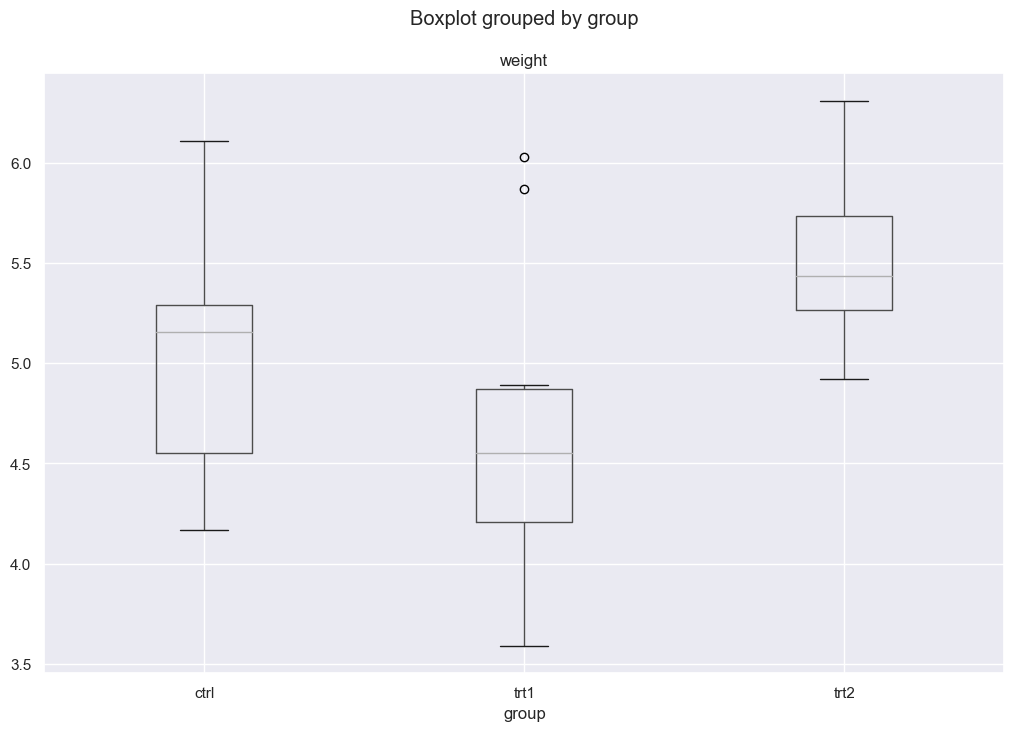

In [5]:
# CELL 3

import pandas as pd
from scipy import stats

url = "https://github.com/muratfirat78/CPP_Datasets/raw/main/PlantGrowth.csv"
data = pd.read_csv(url)
data.boxplot("weight", by="group", figsize=(12, 8))
data = data.convert_dtypes()
print("----> Size of the data set:",len(data))

print("----> Columns and data types:")     
print(data.dtypes)

print("----> Unique values of columns:")
for col in data.columns:
        print(col,": ",len(data[col].unique()))
        
data.head(5)    


In PlantGrowth dataset, define the groups of plants with respect to feature "group" of values ctrl, trt1, and trt2. Conduct an ANOVA to test if the plant weights of three groups come from the same population.

In [6]:

# CELL 4

import pandas as pd

def ANOVA(dataframe,groupfeature,valuefeature):
    
    print('-------------- ANOVA Testing ---------------')
    print('Data size: ',len(dataframe),', groups feature: ',groupfeature,', feature of values: ',valuefeature)
    N = len(dataframe) ; k = len(pd.unique(dataframe[groupfeature])); n = dataframe.groupby(groupfeature).size()[0] 
    DFbetween = k - 1; DFwithin = N - k; DFtotal = N - 1
    
    df_agg = dataframe.groupby([groupfeature], dropna=True)[valuefeature].agg(lambda x:list(x)).reset_index()
    
    groupsizes = [len(x) for x in df_agg[valuefeature]]

    grps = pd.unique(data[groupfeature])
    print('Number of groups: ',k,', all values: ',N,', group sizes: ',groupsizes)
    d_data = {grp:dataframe[valuefeature][dataframe[groupfeature] == grp] for grp in grps}
    
    print('_________________________________')

    SSbetween = (sum(dataframe.groupby(groupfeature).sum()[valuefeature]**2)/n) - (dataframe[valuefeature].sum()**2)/N
    sum_y_squared = sum([value**2 for value in dataframe[valuefeature].values])
    SSwithin = sum_y_squared - sum(dataframe.groupby(groupfeature).sum()[valuefeature]**2)/n
    SStotal = SSbetween+SSwithin 


    MSbetween = SSbetween/DFbetween; MSwithin = SSwithin/DFwithin
    F_man = MSbetween/MSwithin; p_man = stats.f.sf(F_man, DFbetween, DFwithin)
    eta_sqrd = SSbetween/SStotal; om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)


    F, p = stats.f_oneway(d_data["ctrl"], d_data["trt1"], d_data["trt2"])
    print("Manually computation, F-statistic: ",round(F_man,2),", P-value",round(p_man,2))
    print("SciPy calaculated, F-Statistic: ",round(F,2),", P-value",round(p,2))
    
    return F_man,p_man


url = "https://github.com/muratfirat78/CPP_Datasets/raw/main/PlantGrowth.csv"
data = pd.read_csv(url)
groupfeature = "group"
valuefeature = 'weight'



fncreturn = ANOVA(data,groupfeature,valuefeature)


-------------- ANOVA Testing ---------------
Data size:  30 , groups feature:  group , feature of values:  weight
Number of groups:  3 , all values:  30 , group sizes:  [10, 10, 10]
_________________________________
Manually computation, F-statistic:  4.85 , P-value 0.02
SciPy calaculated, F-Statistic:  4.85 , P-value 0.02


----------
### Correlation and Causality

Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. 

Correlation Coefficient: A single number, denoted by ‘r’, that describes the degree of relationship between two variables. Its value ranges from +1.0 to –1.0.



If r < 0, the variables move in opposite directions, that is when one increases the other decreases or vice versa.


If r > 0, the variables both variables move in tandem, that is when one increases the other decreases or vice versa.

Simple linear regression analysis is used to find the correlation coefficient. 


In [7]:
# CELL 5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pip install xlrd

url = "https://github.com/muratfirat78/CPP_Datasets/raw/main/DataForTable2.1.xls"
df = pd.read_excel(url)
df.head(200)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Bolivia,2014,5.864799,8.952947,0.821345,62.500000,0.881059,0.017006,0.831854,0.769011,0.398219,0.468561
196,Bolivia,2015,5.834329,8.985247,0.828706,62.700001,0.883625,-0.030384,0.862374,0.748659,0.392903,0.487209
197,Bolivia,2016,5.769723,9.012199,0.795959,62.849998,0.881749,-0.047644,0.852593,0.735729,0.376412,0.401742
198,Bolivia,2017,5.650553,9.038804,0.778662,63.000000,0.883905,-0.121301,0.819262,0.655217,0.433944,0.427633


In [9]:
# CELL 6

import statsmodels.formula.api as smf
import pandas as pd

def standardize(df,col):
    df["std "+col] = (df[col]- df[col].mean())/df[col].std() 


url = "https://github.com/muratfirat78/CPP_Datasets/raw/main/DataForTable2.1.xls"
df = pd.read_excel(url)

colmnlist = ["Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Perceptions of corruption"]
df_grouped = df[df["year"] >= 2017].groupby(["Country name"])[colmnlist].apply(lambda x: x.mean())

for col in colmnlist:
    df_grouped[col] = pd.to_numeric(df_grouped[col], errors='coerce')
df_grouped = df_grouped.dropna()

standardize(df_grouped,colmnlist[0]); standardize(df_grouped,colmnlist[2])

fit = smf.ols('Q("std Log GDP per capita") ~ Q("std Healthy life expectancy at birth")', data=df_grouped).fit() # Fit and summarize OLS model
print("Regression slope (ols)",fit.params['Q("std Healthy life expectancy at birth")'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped["std Log GDP per capita"],df_grouped["std Healthy life expectancy at birth"])
print("Regression slope (stats)",slope)
corr = stats.pearsonr(df_grouped["std Log GDP per capita"], df_grouped["std Healthy life expectancy at birth"] )
print("Perason Correlation: ",corr)

Regression slope (ols) 0.835788777979438
Regression slope (stats) 0.8357887779794387
Perason Correlation:  PearsonRResult(statistic=0.835788777979438, pvalue=9.42651192833962e-38)


###  Causality

Causality means that a change in one variable triggers a change in the other; a cause-and-effect relationship. Besides the correlation, there is also a causal link between them.

In [10]:
# CELL 7

colmnlist = ["Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Perceptions of corruption"]

df_grouped[colmnlist].head()

#df_grouped[colmnlist].corr()


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption
Country name,,,,,
Afghanistan,7.626750,0.468136,53.81875,0.397127,0.938037
Albania,9.504680,0.683931,69.10000,0.786460,0.895407
Algeria,9.333753,0.823405,66.40000,0.507502,0.727050
Argentina,9.989240,0.896478,67.10000,0.827557,0.831761
Armenia,9.468753,0.764005,67.03125,0.765209,0.707579


----------
Causality using Python causality library 

Install: pip install causality

https://pypi.org/project/causality/



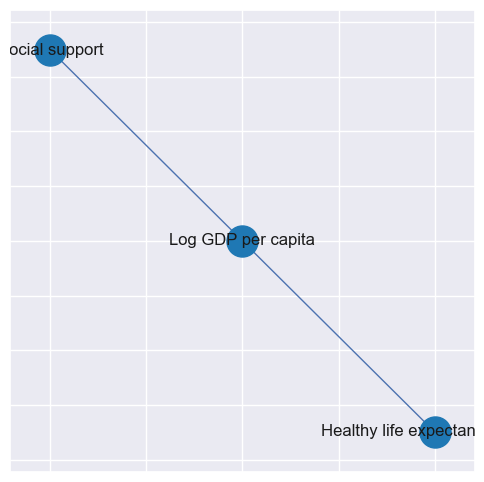

In [11]:

# CELL 7
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest
import networkx as nx

#pip install causality


colmnlist2 = ["Log GDP per capita","Social support","Healthy life expectancy at birth"]
df_grouped = df_grouped[colmnlist2] 

for col in colmnlist2:
    df_grouped[col] = pd.to_numeric(df_grouped[col], errors='coerce')

df_grouped = df_grouped.dropna()

variable_types = {"Log GDP per capita":'c',"Social support":'c',"Healthy life expectancy at birth":'c'}

ic_algorithm = IC(RobustRegressionTest) # run the search
graph = ic_algorithm.search(df_grouped, variable_types)
graph.edges(data=True)

pos = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(graph, pos)
nx.draw_networkx_edges(graph, pos, edge_color='b', arrows=True,arrowsize=20)
plt.show()
